#### Portatil

In [1]:
# Ruta de la carpeta con los archivos CSV en el portátil 
carpeta_origen = 'C:/Users/TITAN OSCURO/Desktop/Datos bicing'

carpeta_origen_bicing = r'D:\Proton Drive\My files\Formación\Cibernarium\IT Academy\Python ciencia de datos\reskilling_data_analytics\Sprint 10 Capston project\Informacio_Estacions_Bicing_2025.csv'

#### Torre

In [5]:
# Ruta de la carpeta con los archivos CSV en la torre
carpeta_origen = "C:/Users/isana/Desktop/Datos bicing"

carpeta_origen_bicing = r'C:\Users\isana\Documents\GitHub\reskilling_data_analytics\Sprint 10 Capston project\Informacio_Estacions_Bicing_2025.csv'

### Estaciones del bicing:

In [2]:
import pandas as pd
import os

# Leer el archivo CSV y guardarlo en un dataframe
ruta_archivo = os.path.join(carpeta_origen_bicing)
Info_bicing_csv = pd.read_csv(ruta_archivo)

# Visualizar el contenido del dataframe
print('Dataframe cargado exitosamente: Info_bicing_csv')

Dataframe cargado exitosamente: Info_bicing_csv


In [3]:
# eliminar variables que no aportan información:
Info_bicing_csv.drop(columns=['is_valet_station','rental_uris'], inplace=True)

### Extracción sample 10k de datos

In [4]:
import pandas as pd   

dataframe_consolidado  = pd.read_csv('dataframe_consolidado_sample_10k.csv')

#### mapa de barcelona

#### portatil:

In [5]:
distritos_geojson = r'D:\Proton Drive\My files\Formación\Cibernarium\IT Academy\Python ciencia de datos\reskilling_data_analytics\Sprint 10 Capston project\districtes.geojson'

#### torre:

In [ ]:
distritos_geojson = r'C:\Users\isana\Documents\GitHub\reskilling_data_analytics\Sprint 10 Capston project\districtes.geojson'

### Gráficos

#### Mapa geolocalización estaciones del bicing

In [6]:
import plotly.express as px
import geopandas as gpd
import pandas as pd
import fiona

# Cargar el archivo GeoDataFrame con información de los distritos
try:
    districts = gpd.read_file(distritos_geojson)
except fiona.errors.DriverError:
    print(f"Error: No se pudo abrir el archivo {distritos_geojson}. Asegúrate de que sea un GeoJSON válido.")
    exit()

# *** OPCIONES PARA MEJORAR LA PRECISIÓN DE LA GEOMETRÍA ***
# Reducir el umbral de simplificación
districts['geometry'] = districts['geometry'].apply(lambda x: x.simplify(0.0001))

# Asegúrate de usar el sistema de coordenadas WGS84 (EPSG:4326)
districts = districts.to_crs('EPSG:4326')

# Definir una lista de colores HEX
colores_hex = [
    '#000000',  # Negro Ciutat Vella
    '#377EB8',  # Azul Eixample
    '#DB6D00',  # Marrón Gracia
    '#490092',  # Morado
    '#F100F1',  # Naranja Les corts
    '#FFFF33',  # Amarillo Nou Barris
    '#A65628',  # Marrón
    '#F781BF',  # Rosa Sant-Martí
    '#FFB900',  # Dorado Sants-Montjuïc
    '#66A61E'   # Verde oscuro
    # Añade más colores hex si tienes más distritos
]

def hex_to_rgba(hex_color, alpha):
    """Convierte un color HEX a formato RGBA con la transparencia especificada."""
    hex_color = hex_color.lstrip('#')
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)
    return f'rgba({r}, {g}, {b}, {alpha})'

# Convertir los colores HEX a RGBA con transparencia 0.3
colores_translucidos_hex = [hex_to_rgba(hex_color, 0.3) for hex_color in colores_hex[:len(districts)]]

# Crear el mapa base de los distritos
fig = px.choropleth_map(
    districts,
    geojson=districts.geometry.__geo_interface__,
    locations=districts.index,
    color='NOM',
    category_orders={"NOM": districts['NOM'].sort_values().unique().tolist()},
    color_discrete_sequence=colores_translucidos_hex,
    center={"lat": 41.3851, "lon": 2.1734},
    zoom=11,
    title="Estaciones Bicing geolocalizadas en Barcelona",
    labels={'NOM': 'Nombre del Distrito'}
)

# --- Añadir las estaciones de Bicing ---
# ASUMIENDO QUE 'Info_bicing_csv' ES TU DATAFRAME CARGADO CON TODOS LOS DATOS
# Y TIENE LAS COLUMNAS 'lat', 'lon' Y 'name'

fig.add_trace(px.scatter_map(Info_bicing_csv, lat="lat", lon="lon",
                             zoom=12, size_max=9,
                             color_discrete_sequence=["#E9514C"],
                             opacity=0.9,
                             hover_data={'lat': False, 'lon': False, 'station_id': True}  # Solo especificamos 'name'
                             ).data[0])

# Modificar el tamaño del layout
fig.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0},
    width=1500,  # Ajusta el ancho a tu preferencia
    height=700   # Ajusta la altura a tu preferencia para hacerlo más cuadrado
)

fig.show()

#fig.write_html("Geologalizacion_estaciones_bicing.html")

mapa de calor only lat long sin los barrios. mitja per hora. 

#### Gráfico de Barras recuento estaciones bicing

In [ ]:
import plotly.express as px
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# --- Cargar y Preparar Datos de Distritos ---
try:
    districts = gpd.read_file(distritos_geojson)

    districts = districts.to_crs('EPSG:4326')
    
except Exception as e:
    print(f"Error al cargar o preparar el GeoDataFrame de distritos: {e}")
    exit()

# --- Cargar y Preparar Datos de Estaciones de Bicing ---
try:
    geometry = [Point(xy) for xy in zip(Info_bicing_csv['lon'], Info_bicing_csv['lat'])]
    bicing_gdf = gpd.GeoDataFrame(Info_bicing_csv, geometry=geometry, crs="EPSG:4326")

except Exception as e:
    print(f"Error al cargar o preparar el GeoDataFrame de Bicing: {e}")
    exit()

# --- Realizar la Unión Espacial ---
try:
    estaciones_por_distrito = gpd.sjoin(bicing_gdf, districts, how="inner", predicate='within')

except Exception as e:
    print(f"Error al realizar la unión espacial: {e}")
    exit()

# --- Agrupar y Contar Estaciones por Distrito ---
try:
    estaciones_conteo = estaciones_por_distrito.groupby('NOM').size().reset_index(name='num_estaciones')
    estaciones_conteo = estaciones_conteo.sort_values(by='num_estaciones', ascending=False)

except Exception as e:
    print(f"Error al agrupar y contar las estaciones: {e}")
    exit()

# --- Crear el Gráfico de Barras ---
try:
    fig_barras = px.bar(estaciones_conteo,
                        x='NOM',
                        y='num_estaciones',
                        title='Número de Estaciones de Bicing por Distrito',
                        labels={'NOM': 'Distrito', 'num_estaciones': 'Número de Estaciones'},
                        hover_data={'NOM': True,
                                    'num_estaciones': True})

    fig_barras.update_traces(hovertemplate="<b>Distrito</b>: %{x}<br>" +
                                            "<b>Número de Estaciones</b>: %{y}<extra></extra>")

    # --- Añadir Anotación con la Suma Total ---
    total_estaciones = estaciones_conteo['num_estaciones'].sum()
    fig_barras.add_annotation(
        text=f'<b>Estaciones de Bicing en Barcelona: {total_estaciones}</b>',
        xref="paper", yref="paper",
        x=0.5, y=1.1,
        showarrow=False,
        font=dict(size=16)
    )

    fig_barras.show()

except Exception as e:
    print(f"Error al crear o mostrar el gráfico de barras: {e}")
    exit()

#fig_barras.write_html("Num_estaciones_bicing.html")


#### Mapa de calor uso bicing:

In [8]:
dataframe_consolidado_unido = pd.merge(dataframe_consolidado , Info_bicing_csv, on='station_id', how='inner')

In [ ]:
import plotly.express as px
import pandas as pd

# Asegurarse de que las columnas de latitud y longitud sean numéricas
dataframe_consolidado_unido['lat'] = pd.to_numeric(dataframe_consolidado_unido['lat'], errors='coerce')
dataframe_consolidado_unido['lon'] = pd.to_numeric(dataframe_consolidado_unido['lon'], errors='coerce')

# Eliminar filas con valores NaN en latitud o longitud
dataframe_consolidado_unido.dropna(subset=['lat', 'lon'], inplace=True)

# Extraer la hora de la columna 'last_updated'
dataframe_consolidado_unido['hora'] = dataframe_consolidado_unido['last_updated'].dt.hour

# Calcular una aproximación de 'bicis en uso'
dataframe_consolidado_unido['bicis_en_uso'] = dataframe_consolidado_unido['capacity'] - dataframe_consolidado_unido['num_docks_available']
dataframe_consolidado_unido['bicis_en_uso'] = dataframe_consolidado_unido['bicis_en_uso'].clip(lower=0) # Asegurarse de que no haya valores negativos

# Calcular el promedio de 'bicis_en_uso' por estación y hora
df_promedio_hora = dataframe_consolidado_unido.groupby(['station_id', 'lat', 'lon', 'name', 'hora'])['bicis_en_uso'].mean().reset_index()

# Definir el orden de las horas
orden_horas = list(range(6, 24)) + list(range(0, 6))

# Convertir la columna 'hora' a categórica con el orden especificado
df_promedio_hora['hora'] = pd.Categorical(df_promedio_hora['hora'], categories=orden_horas, ordered=True)

# Definir la escala de color fija
color_scale_fixed = ["#1E2A78", "#FF2E4C"]
range_color_fixed = [0, 60]

# Crear el mapa de dispersión con un slider para la hora y degradado de colores fijo
fig_stations_promedio = px.scatter_map(
    df_promedio_hora,
    lat="lat",
    lon="lon",
    size="bicis_en_uso",   # El tamaño ahora representa el promedio de bicis en uso
    color="bicis_en_uso",   # El color también representa el promedio de bicis en uso
    color_continuous_scale=color_scale_fixed,
    range_color=range_color_fixed,
    zoom=12,
    height=700,
    width=1500,
    title="Promedio de Bicis Usadas por Hora en Estaciones de Bicing",
    hover_data={
        'station_id': True,
        'bicis_en_uso': ':.2f',   # Formatea el número de bicis en uso a 2 decimales
        'hora': True,
        'lat': False,
        'lon': False,
        'name': True # Incluimos 'name' en hover_data
    },
    animation_frame="hora",
    category_orders={"hora": orden_horas},
    labels={'bicis_en_uso': 'Bicis en uso', 'hora': 'Hora', 'station_id': 'ID Estación', 'name': 'Estación'} # Define las etiquetas para hover
)

fig_stations_promedio.update_layout(map_style="open-street-map")
fig_stations_promedio.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

# Personalizar la barra de color
fig_stations_promedio.update_layout(
    coloraxis_colorbar=dict(
        title="Bicis en uso",
        tickvals=list(range(0, 61, 5)),
        ticktext=[str(i) for i in range(0, 61, 5)]
    )
)

# Personalizar el hover template para un mejor formato
fig_stations_promedio.update_traces(hovertemplate="<b>%{customdata[3]}</b><br>" + # El nombre ahora está en el índice 3
                                     "Hora: %{customdata[4]}<br>" +       # La hora ahora está en el índice 4
                                     "Bicis en uso: %{customdata[0]:.2f}<br>" +
                                     "ID Estación: %{customdata[5]}<extra></extra>",
                                customdata=df_promedio_hora[['bicis_en_uso', 'lat', 'lon', 'name','hora', 'station_id']].values.tolist()) # Añadimos 'name' a customdata


# Personalizar el slider (opcional)
fig_stations_promedio.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
fig_stations_promedio.layout.sliders[0]['pad']['b'] = 50
fig_stations_promedio.layout.sliders[0]['currentvalue']['prefix'] = 'Hora: '
fig_stations_promedio.layout.sliders[0]['steps'] = [
    {'label': str(h), 'method': 'animate', 'args': [[str(h)], {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}]}
    for h in orden_horas
]

fig_stations_promedio.show()

fig_stations_promedio.write_html("Mapa_de_calor_uso_bicis.html")

crear barras apiladas de bicis normales y electricas por barrio y evolución por años

crear el año con un dropdown desplegable. o concatenar el eje temporal con el año y alargarlo 

#### crear tabla para ver promedio por barrios y hacer h0 o h1

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Ruta al archivo GeoJSON de distritos
distritos_geojson_path = r'D:\Proton Drive\My files\Formación\Cibernarium\IT Academy\Python ciencia de datos\reskilling_data_analytics\Sprint 10 Capston project\districtes.geojson'

# Cargar el archivo GeoJSON de distritos
try:
    distritos = gpd.read_file(distritos_geojson_path)
except FileNotFoundError:
    print(f"Error: El archivo {distritos_geojson_path} no fue encontrado.")
    exit()

# Asegurarse de que la columna 'last_updated' sea datetime y extraer la hora
dataframe_consolidado_unido['last_updated'] = pd.to_datetime(dataframe_consolidado_unido['last_updated'], errors='coerce')
dataframe_consolidado_unido.dropna(subset=['last_updated'], inplace=True) # Eliminar filas con errores de conversión de fecha
dataframe_consolidado_unido['hora'] = dataframe_consolidado_unido['last_updated'].dt.hour

# Calcular una aproximación de 'bicis en uso' (si aún no está definida)
if 'bicis_en_uso' not in dataframe_consolidado_unido.columns:
    dataframe_consolidado_unido['bicis_en_uso'] = dataframe_consolidado_unido['capacity'] - dataframe_consolidado_unido['num_docks_available']
    dataframe_consolidado_unido['bicis_en_uso'] = dataframe_consolidado_unido['bicis_en_uso'].clip(lower=0)

# Obtener las ubicaciones únicas de las estaciones
estaciones_unicas = dataframe_consolidado_unido[['station_id', 'lat', 'lon']].drop_duplicates(subset=['station_id']).set_index('station_id')

# Crear un GeoDataFrame con las ubicaciones únicas
geometry = [Point(xy) for xy in zip(estaciones_unicas['lon'], estaciones_unicas['lat'])]
geo_estaciones = gpd.GeoDataFrame(estaciones_unicas, geometry=geometry, crs=distritos.crs)

# Realizar la unión espacial para obtener el distrito (manteniendo solo las columnas necesarias)
estaciones_con_distrito = gpd.sjoin(geo_estaciones[['geometry']], distritos[['NOM', 'geometry']], how='left', predicate='within')

# Crear un DataFrame con el distrito por station_id
distrito_por_estacion = estaciones_con_distrito[['NOM']].rename(columns={'NOM': 'distrito'})

# Calcular el promedio de 'bicis_en_uso' por 'station_id' y hora (con unstack)
promedio_uso_por_estacion_hora = dataframe_consolidado_unido.groupby(['station_id', 'hora'])['bicis_en_uso'].mean().round(3).unstack(fill_value=0)

# "Despivotar" la tabla usando melt
tabla_melted = pd.melt(promedio_uso_por_estacion_hora.reset_index(),
                       id_vars='station_id',
                       value_vars=range(24),
                       var_name='hora',
                       value_name='promedio_uso')

# Unir la información del distrito al DataFrame melted
tabla_final = pd.merge(tabla_melted, distrito_por_estacion.reset_index(), on='station_id', how='left')

print(tabla_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    12120 non-null  float64
 1   hora          12120 non-null  object 
 2   promedio_uso  12120 non-null  float64
 3   distrito      12120 non-null  object 
dtypes: float64(2), object(2)
memory usage: 378.9+ KB
None


In [26]:
# creación dataset de los distritos de barcelona por renta
# datos noticia 2024 https://barcelonasecreta.com/salarios-distritos-barcelona/: 
distritos = ['Sarrià – Sant Gervasi','Les Corts','Eixample','Gràcia','Sant Martí','Horta – Guinardó',
            'Sant Andreu','Sants – Montjuïc','Ciutat Vella','Nou Barris']
renta_x_distrito = [54998.56,42831.83, 38261.04,35923.3,33611.37, 30695.7,30326.19,29894.31,24920.92,24784.87]

# creación dataframe:
df_renta = pd.DataFrame({'Distrito': distritos, 'Renta_media': renta_x_distrito})

In [ ]:
# merge tabla final con renta por distritos
tabla_final = pd.DataFrame(tabla_final)

tabla_final_renta = pd.merge(tabla_final,df_renta, left_on='distrito', right_on='Distrito', how='inner')

tabla_final_renta.drop(columns='distrito', inplace=True)

In [30]:
tabla_final_renta.isna().sum()

station_id      0
hora            0
promedio_uso    0
Distrito        0
Renta_media     0
dtype: int64

### Pruebas estadísticas para comprobar Hipótesis:

#### Prueva estadistica: Kruskal-Wallis sin contar con los barrios

In [12]:
from scipy.stats import kruskal
import pandas as pd

# Asumimos que 'tabla_final' es tu DataFrame y tiene las columnas 'hora' y 'promedio_uso'

# Obtener los promedios de uso para cada hora
grupos_uso_hora = []
horas_unicas = tabla_final['hora'].unique()
for hora in sorted(horas_unicas):
    uso_hora = tabla_final[tabla_final['hora'] == hora]['promedio_uso'].values
    grupos_uso_hora.append(uso_hora)

# Realizar la prueba de Kruskal-Wallis
if len(grupos_uso_hora) >= 2 and all(len(grupo) > 0 for grupo in grupos_uso_hora):
    stat, p = kruskal(*grupos_uso_hora)
    print("Resultados de Kruskal-Wallis para todas las horas:")
    print(f"Estadístico = {stat:.3f}, p-valor = {p:.3f}")
    if p < 0.05:
        print("Hay diferencias significativas en el uso promedio entre al menos dos horas.")
    else:
        print("No hay diferencias significativas en el uso promedio entre las horas.")
else:
    print("No hay suficientes horas o datos para realizar la prueba de Kruskal-Wallis.")

Resultados de Kruskal-Wallis para todas las horas:
Estadístico = 22.420, p-valor = 0.495
No hay diferencias significativas en el uso promedio entre las horas.


#### fin del analisis por horas no hay No hay diferencias significativas en el uso promedio entre las horas.

#### Prueva estadistica: Kruskal-Wallis por distritos

In [13]:
from scipy.stats import kruskal
import pandas as pd

# Asumimos que 'tabla_final' es tu DataFrame y tiene las columnas 'distrito' y 'promedio_uso'

# Obtener los promedios de uso para cada distrito
grupos_uso_distrito = []
distritos_unicos = tabla_final['distrito'].unique()
for distrito in distritos_unicos:
    uso_distrito = tabla_final[tabla_final['distrito'] == distrito]['promedio_uso'].values
    grupos_uso_distrito.append(uso_distrito)

# Realizar la prueba de Kruskal-Wallis
if len(grupos_uso_distrito) >= 2 and all(len(grupo) > 0 for grupo in grupos_uso_distrito):
    stat, p = kruskal(*grupos_uso_distrito)
    print("Resultados de Kruskal-Wallis para los distritos:")
    print(f"Estadístico = {stat:.3f}, p-valor = {p:.3f}")
    if p < 0.05:
        print("Hay diferencias significativas en el uso promedio entre al menos dos distritos.")
    else:
        print("No hay diferencias significativas en el uso promedio entre los distritos.")
else:
    print("No hay suficientes distritos o datos para realizar la prueba de Kruskal-Wallis.")

Resultados de Kruskal-Wallis para los distritos:
Estadístico = 175.111, p-valor = 0.000
Hay diferencias significativas en el uso promedio entre al menos dos distritos.


#### Prueba por pares de Dunn para uso promedi y distritos

In [28]:
from scipy.stats import kruskal
import pandas as pd
import scikit_posthocs as sp

# Asumimos que 'tabla_final' es tu DataFrame y tiene las columnas 'distrito' y 'promedio_uso'

# Obtener los promedios de uso para cada distrito
grupos_uso_distrito = []
distritos_unicos = sorted(tabla_final['distrito'].unique()) # Ordenamos para una mejor visualización en la salida
for distrito in distritos_unicos:
    uso_distrito = tabla_final[tabla_final['distrito'] == distrito]['promedio_uso'].values
    grupos_uso_distrito.append(uso_distrito)

# Realizar la prueba de Kruskal-Wallis
if len(grupos_uso_distrito) >= 2 and all(len(grupo) > 0 for grupo in grupos_uso_distrito):
    stat, p = kruskal(*grupos_uso_distrito)
    print("Resultados de Kruskal-Wallis para los distritos:")
    print(f"Estadístico = {stat:.3f}, p-valor = {p:.3f}")
    if p < 0.05:
        print("Hay diferencias significativas en el uso promedio entre al menos dos distritos.")

        # Realizar la prueba post-hoc de Dunn
        p_values = sp.posthoc_dunn(grupos_uso_distrito, p_adjust='bonferroni') # Puedes probar otros métodos de ajuste p
        print("\nResultados de la prueba post-hoc de Dunn (p-valores ajustados por Bonferroni):")
        print(p_values)
    else:
        print("No hay diferencias significativas en el uso promedio entre los distritos, por lo que no se realiza la prueba post-hoc.")
else:
    print("No hay suficientes distritos o datos para realizar la prueba de Kruskal-Wallis.")

Resultados de Kruskal-Wallis para los distritos:
Estadístico = 175.111, p-valor = 0.000
Hay diferencias significativas en el uso promedio entre al menos dos distritos.

Resultados de la prueba post-hoc de Dunn (p-valores ajustados por Bonferroni):
              1             2             3             4             5   \
1   1.000000e+00  3.322303e-03  1.326033e-05  2.735999e-07  4.774582e-06   
2   3.322303e-03  1.000000e+00  3.179503e-01  7.905763e-02  5.100376e-01   
3   1.326033e-05  3.179503e-01  1.000000e+00  1.000000e+00  1.000000e+00   
4   2.735999e-07  7.905763e-02  1.000000e+00  1.000000e+00  1.000000e+00   
5   4.774582e-06  5.100376e-01  1.000000e+00  1.000000e+00  1.000000e+00   
6   9.761696e-09  6.095994e-03  1.000000e+00  1.000000e+00  1.000000e+00   
7   1.000000e+00  1.000000e+00  4.525334e-03  5.492782e-04  4.937163e-03   
8   1.000000e+00  1.933128e-05  4.146751e-07  1.777038e-09  4.803307e-08   
9   3.808009e-02  1.000000e+00  7.145589e-01  2.930682e-01  1.000000

#### Prueva estadistica: Kruskal-Wallis por distritos teniendo en cuenta la renta

In [25]:
from scipy.stats import kruskal
import pandas as pd

# Asumimos que 'tabla_final_renta' es tu DataFrame

# Calcular la mediana de la renta media
mediana_renta = tabla_final_renta['Renta_media'].median()
print(f"La mediana de la renta media es: {mediana_renta:.2f}")

# Crear los grupos de renta alta y renta baja
grupo_renta_baja = tabla_final_renta[tabla_final_renta['Renta_media'] <= mediana_renta]['promedio_uso'].values
grupo_renta_alta = tabla_final_renta[tabla_final_renta['Renta_media'] > mediana_renta]['promedio_uso'].values

# Realizar la prueba de Kruskal-Wallis
if len(grupo_renta_baja) > 0 and len(grupo_renta_alta) > 0:
    stat, p = kruskal(grupo_renta_baja, grupo_renta_alta)
    print("\nResultados de Kruskal-Wallis comparando grupos de renta:")
    print(f"Estadístico = {stat:.3f}, p-valor = {p:.3f}")
    if p < 0.05:
        print("Hay diferencias significativas en el uso promedio entre los grupos de renta alta y baja.")
    else:
        print("No hay diferencias significativas en el uso promedio entre los grupos de renta alta y baja.")
else:
    print("\nNo hay suficientes datos en uno o ambos grupos de renta para realizar la prueba de Kruskal-Wallis.")

La mediana de la renta media es: 33611.37

Resultados de Kruskal-Wallis comparando grupos de renta:
Estadístico = 37.060, p-valor = 0.000
Hay diferencias significativas en el uso promedio entre los grupos de renta alta y baja.


#### Pruebas Dunn para distritos uso promedio y renta

In [35]:
from scipy.stats import kruskal
import pandas as pd
import scikit_posthocs as sp
import numpy as np

# Asumimos que 'tabla_final_renta' es tu DataFrame

# Calcular la mediana de la renta media
mediana_renta = tabla_final_renta['Renta_media'].median()
print(f"La mediana de la renta media es: {mediana_renta:.2f}")

# Crear los grupos de renta alta y renta baja
grupo_renta_baja = tabla_final_renta[tabla_final_renta['Renta_media'] <= mediana_renta]['promedio_uso'].values
grupo_renta_alta = tabla_final_renta[tabla_final_renta['Renta_media'] > mediana_renta]['promedio_uso'].values

# Realizar la prueba de Kruskal-Wallis
if len(grupo_renta_baja) > 0 and len(grupo_renta_alta) > 0:
    stat, p_kruskal = kruskal(grupo_renta_baja, grupo_renta_alta)
    print("\nResultados de Kruskal-Wallis comparando grupos de renta:")
    print(f"Estadístico = {stat:.3f}, p-valor = {p_kruskal:.3f}")
    if p_kruskal < 0.05:
        print("Hay diferencias significativas en el uso promedio entre los grupos de renta alta y baja.")

        # Realizar la prueba post-hoc de Dunn
        data = [grupo_renta_baja, grupo_renta_alta]
        p_values_dunn = sp.posthoc_dunn(data, p_adjust='bonferroni')

        print("\nTipo de p_values_dunn:", type(p_values_dunn)) # Imprimir el tipo de dato de p_values_dunn

        print("\nResultados de la prueba post-hoc de Dunn (p-valor ajustado por Bonferroni):")
        # Intentamos acceder al p-valor nuevamente
        if isinstance(p_values_dunn, np.ndarray) and p_values_dunn.shape == (2, 2):
            p_dunn = p_values_dunn[0, 1]
            print(f"P-valor (Renta Baja vs. Renta Alta) = {p_dunn:.3f}")
        else:
            print("La estructura de p_values_dunn no es la esperada.")
            print("Contenido de p_values_dunn:", p_values_dunn)

    else:
        print("No hay diferencias significativas en el uso promedio entre los grupos de renta alta y baja, por lo que no se realiza la prueba post-hoc.")
else:
    print("\nNo hay suficientes datos en uno o ambos grupos de renta para realizar la prueba de Kruskal-Wallis.")

La mediana de la renta media es: 33611.37

Resultados de Kruskal-Wallis comparando grupos de renta:
Estadístico = 37.060, p-valor = 0.000
Hay diferencias significativas en el uso promedio entre los grupos de renta alta y baja.

Tipo de p_values_dunn: <class 'pandas.core.frame.DataFrame'>

Resultados de la prueba post-hoc de Dunn (p-valor ajustado por Bonferroni):
La estructura de p_values_dunn no es la esperada.
Contenido de p_values_dunn:               1             2
1  1.000000e+00  1.145212e-09
2  1.145212e-09  1.000000e+00


#### matriz relaciones dunn por distritos y uso promedio

In [39]:
import pandas as pd
import plotly.graph_objects as go

# Reutilizamos el DataFrame 'data_significativos'
data_significativos = pd.DataFrame({
    'hora': [2, 2, 10, 12, 12, 14, 14, 17, 17, 18, 18, 18, 19, 19],
    'distrito1': ['Ciutat Vella', 'Sant Andreu', 'Horta-Guinardó', 'Gràcia', 'Sant Andreu', 'Ciutat Vella', 'Ciutat Vella', 'Ciutat Vella', 'Sant Andreu', 'Ciutat Vella', 'Ciutat Vella', 'Ciutat Vella', 'Eixample', 'Sant Martí'],
    'distrito2': ['Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sant Martí', 'Sant Martí', 'Sant Martí', 'Nou Barris', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Eixample', 'Les Corts', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi'],
    'p_valor': [0.039528, 0.001341, 0.032122, 0.011381, 0.047694, 0.043445, 0.024867, 0.031062, 0.041190, 0.007283, 0.005686, 0.003986, 0.034714, 0.000634]
})

distritos_unicos = sorted(pd.concat([data_significativos['distrito1'], data_significativos['distrito2']]).unique())
horas_unicas = sorted(data_significativos['hora'].unique())

z_matrix = []
annotation_text = []
for d1 in distritos_unicos:
    row_z = []
    row_text = []
    for d2 in distritos_unicos:
        horas_conexion = data_significativos[((data_significativos['distrito1'] == d1) & (data_significativos['distrito2'] == d2)) | ((data_significativos['distrito1'] == d2) & (data_significativos['distrito2'] == d1))]
        if not horas_conexion.empty:
            row_z.append(1)  # Indicamos que hay una conexión significativa
            row_text.append(', '.join(map(str, sorted(horas_conexion['hora'].unique()))))
        else:
            row_z.append(0)
            row_text.append('')
    z_matrix.append(row_z)
    annotation_text.append(row_text)

fig = go.Figure(data=go.Heatmap(
    z=z_matrix,
    x=distritos_unicos,
    y=distritos_unicos,
    colorscale=[[0, 'white'], [1, 'lightcoral']], # Puedes ajustar los colores
    colorbar=dict(tickvals=[0, 1], ticktext=['No Significativo', 'Significativo']),
    text=annotation_text,
    texttemplate="%{text}",
    textfont={"size": 10}
))

fig.update_layout(
    title='Conexiones Significativas entre Distritos por promedio de uso',
    xaxis_title='Distrito 2',
    yaxis_title='Distrito 1',
    xaxis_side='top',
    width=800,
    height=700,
    margin=dict(t=150) # Aumentamos el margen superior para el título
)

fig.show()

# Para guardar el gráfico como un archivo HTML:
fig.write_html("Distritos_por_promedio_de_uso.html")

In [41]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from collections import defaultdict

# Reutilizamos el DataFrame 'data_significativos'
data_significativos = pd.DataFrame({
    'hora': [2, 2, 10, 12, 12, 14, 14, 17, 17, 18, 18, 18, 19, 19],
    'distrito1': ['Ciutat Vella', 'Sant Andreu', 'Horta-Guinardó', 'Gràcia', 'Sant Andreu', 'Ciutat Vella', 'Ciutat Vella', 'Ciutat Vella', 'Sant Andreu', 'Ciutat Vella', 'Ciutat Vella', 'Ciutat Vella', 'Eixample', 'Sant Martí'],
    'distrito2': ['Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sant Martí', 'Sant Martí', 'Sant Martí', 'Nou Barris', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Eixample', 'Les Corts', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi'],
    'p_valor': [0.039528, 0.001341, 0.032122, 0.011381, 0.047694, 0.043445, 0.024867, 0.031062, 0.041190, 0.007283, 0.005686, 0.003986, 0.034714, 0.000634]
})

grafo = nx.Graph()
conteo_conexiones = defaultdict(int)

for index, row in data_significativos.iterrows():
    d1 = row['distrito1']
    d2 = row['distrito2']
    grafo.add_edge(d1, d2)
    # Contar la frecuencia de cada conexión
    if (d1, d2) in conteo_conexiones:
        conteo_conexiones[(d1, d2)] += 1
    elif (d2, d1) in conteo_conexiones:
        conteo_conexiones[(d2, d1)] += 1
    else:
        conteo_conexiones[(d1, d2)] = 1

# Calcular la posición de los nodos con el mismo layout que matplotlib
pos = nx.spring_layout(grafo, seed=42)

# Crear trazas para cada arista individualmente
edge_traces = []
for edge in grafo.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    width = conteo_conexiones.get(tuple(sorted(edge)), 1)
    edge_trace = go.Scatter(
        x=[x0, x1], y=[y0, y1],
        line=dict(width=width * 1.5, color='lightgray'), # Aumentamos el grosor base para mejor visualización
        hoverinfo='none',
        mode='lines'
    )
    edge_traces.append(edge_trace)

# Crear la traza de los nodos
node_x = []
node_y = []
node_text = []
for node in grafo.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(size=35, color='lightblue'), # Aumentamos el tamaño de los nodos
    text=node_text,
    textposition='middle center'
)

# Crear la figura
fig = go.Figure(data=edge_traces + [node_trace],
                 layout=go.Layout(
                    title=dict(
                        text='Gráfico de Red de Conexiones Significativas entre Distritos',
                        font=dict(size=18) # Aumentamos el tamaño del título
                    ),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=60), # Aumentamos el margen superior ligeramente
                    annotations=[ dict(text="Grosor de la arista = frecuencia de la conexión",
                                        showarrow=False,
                                        xref="paper", yref="paper",
                                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                 )
fig.show()

# Exportar a HTML
fig.write_html("grafo_red_distritos.html")

#### Prueba kruskal wallis

In [45]:
import pandas as pd
from scipy.stats import kruskal

# Supongamos que ya tienes tu DataFrame 'tabla_final_renta' cargado

# Obtenemos los valores de 'Renta_media' para cada distrito
renta_por_distrito = [tabla_final_renta['Renta_media'][tabla_final_renta['Distrito'] == distrito].values
                       for distrito in tabla_final_renta['Distrito'].unique()]

# Realizamos la prueba de Kruskal-Wallis
estadistico, p_valor = kruskal(*renta_por_distrito)

print(f"Estadístico de Kruskal-Wallis: {estadistico:.2f}")
print(f"Valor p: {p_valor:.3f}")

# Interpretación del resultado
alpha = 0.05
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas en la renta media entre al menos dos distritos.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que existen diferencias significativas en la renta media entre los distritos.")

Estadístico de Kruskal-Wallis: 9311.00
Valor p: 0.000
Rechazamos la hipótesis nula: Hay diferencias significativas en la renta media entre al menos dos distritos.


#### prueba dunn por pares por distritos y renta por media

In [51]:
import pandas as pd
from scipy.stats import kruskal

# Suponiendo que ya tienes tu DataFrame 'tabla_final_renta' cargado
# y que contiene las columnas 'Distrito' y 'Renta_media'.

# Calcula la mediana de la renta media de todos los distritos
mediana_renta_distrito = tabla_final_renta['Renta_media'].median()

# Crea la columna 'Grupo_Renta' basada en el umbral (la mediana de la renta media por distrito)
tabla_final_renta['Grupo_Renta'] = tabla_final_renta['Renta_media'].apply(
    lambda x: 'Superior' if x > mediana_renta_distrito else 'Inferior'
)

# Realiza la prueba de Kruskal-Wallis para comparar 'promedio_uso' entre los grupos de renta
uso_grupo_superior = tabla_final_renta['promedio_uso'][tabla_final_renta['Grupo_Renta'] == 'Superior'].values
uso_grupo_inferior = tabla_final_renta['promedio_uso'][tabla_final_renta['Grupo_Renta'] == 'Inferior'].values

estadistico_kw, p_valor_kw = kruskal(uso_grupo_superior, uso_grupo_inferior)

print("--- Resultados de la prueba de Kruskal-Wallis ---")
print(f"Estadístico de Kruskal-Wallis: {estadistico_kw:.2f}")
print(f"Valor p: {p_valor_kw:.3f}")

# Interpretación de la prueba de Kruskal-Wallis
alpha = 0.05
if p_valor_kw < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas en el promedio de uso entre el grupo de distritos de renta superior e inferior.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que existen diferencias significativas en el promedio de uso entre los grupos de distritos de renta.")

# Ya que solo tienes dos grupos, la prueba de Dunn no es necesaria para comparaciones por pares.
# Si la prueba de Kruskal-Wallis es significativa, sabrás que los dos grupos difieren.

# Puedes realizar análisis descriptivos adicionales para entender mejor las diferencias:
print("\n--- Análisis descriptivo por Grupo de Renta (Distritos) ---")
print(tabla_final_renta.groupby('Grupo_Renta')['promedio_uso'].describe())

--- Resultados de la prueba de Kruskal-Wallis ---
Estadístico de Kruskal-Wallis: 37.06
Valor p: 0.000
Rechazamos la hipótesis nula: Hay diferencias significativas en el promedio de uso entre el grupo de distritos de renta superior e inferior.

--- Análisis descriptivo por Grupo de Renta (Distritos) ---
              count      mean       std  min  25%  50%   75%   max
Grupo_Renta                                                       
Inferior     5328.0  7.222132  8.808755  0.0  0.0  4.0  13.0  54.0
Superior     3984.0  5.596080  7.221166  0.0  0.0  2.0  10.0  41.0


In [ ]:
import pandas as pd
import plotly.express as px

# Suponiendo que ya tienes tu DataFrame 'tabla_final_renta' cargado
# y que contiene las columnas 'Grupo_Renta' y 'promedio_uso'.

# (El código para calcular 'Grupo_Renta' ya lo proporcionaste, así que lo incluimos aquí para que el ejemplo sea completo)
# Calcula la mediana de la renta media de todos los distritos
mediana_renta_distrito = tabla_final_renta['Renta_media'].median()

# Crea la columna 'Grupo_Renta' basada en el umbral (la mediana de la renta media por distrito)
tabla_final_renta['Grupo_Renta'] = tabla_final_renta['Renta_media'].apply(
    lambda x: 'Superior' if x > mediana_renta_distrito else 'Inferior'
)

# Crea el diagrama de cajas con Plotly Express
fig = px.box(tabla_final_renta, x='Grupo_Renta', y='promedio_uso',
             color='Grupo_Renta',
             labels={'promedio_uso': 'Promedio de Uso', 'Grupo_Renta': 'Grupo de Renta'})

# Añade un título al gráfico
fig.update_layout(title='Distribución del Promedio de Uso por Grupo de Renta (Distritos)')

# Opcionalmente, puedes seguir mostrando el gráfico en tu entorno
fig.show()

# Exporta el gráfico a un archivo HTML
#fig.write_html("diagrama_cajas_grupos_renta.html")

#### mapa distritos

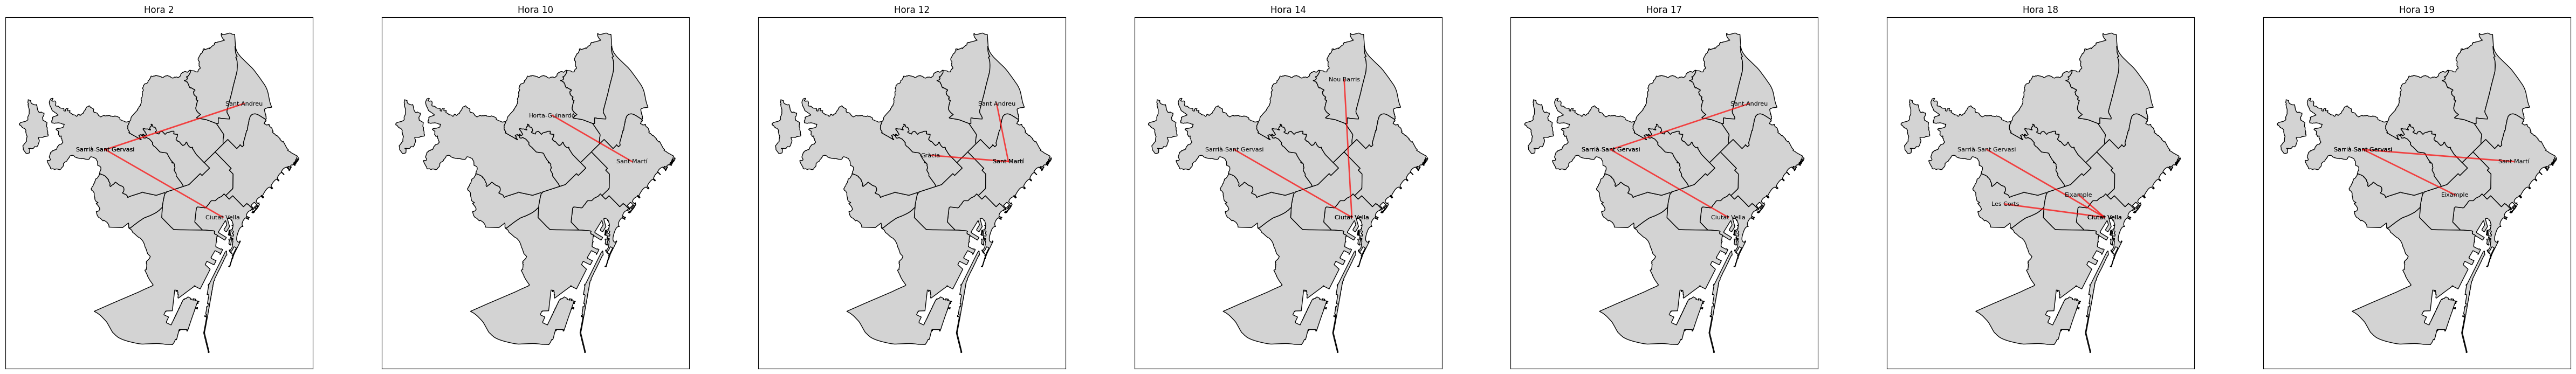

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes tus resultados significativos en un DataFrame como este:
data_significativos = pd.DataFrame({
    'hora': [2, 2, 10, 12, 12, 14, 14, 17, 17, 18, 18, 18, 19, 19],
    'distrito1': ['Ciutat Vella', 'Sant Andreu', 'Horta-Guinardó', 'Gràcia', 'Sant Andreu', 'Ciutat Vella', 'Ciutat Vella', 'Ciutat Vella', 'Sant Andreu', 'Ciutat Vella', 'Ciutat Vella', 'Ciutat Vella', 'Eixample', 'Sant Martí'],
    'distrito2': ['Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sant Martí', 'Sant Martí', 'Sant Martí', 'Nou Barris', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Eixample', 'Les Corts', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi', 'Sarrià-Sant Gervasi'],
    'p_valor': [0.039528, 0.001341, 0.032122, 0.011381, 0.047694, 0.043445, 0.024867, 0.031062, 0.041190, 0.007283, 0.005686, 0.003986, 0.034714, 0.000634]
})

# Cargar el archivo GeoJSON de los distritos de Barcelona
distritos = gpd.read_file(r'D:\Proton Drive\My files\Formación\Cibernarium\IT Academy\Python ciencia de datos\reskilling_data_analytics\Sprint 10 Capston project\districtes.geojson')
distritos.rename(columns={'NOM': 'nombre_distrito'}, inplace=True) # Asegúrate de que la columna con el nombre del distrito se llame 'nombre_distrito'

# **Proyectar los datos al CRS adecuado (ETRS89 / UTM zone 31N)**
distritos_proj = distritos.to_crs(epsg=25831)

# Crear una figura y ejes para los subplots (uno por hora)
horas_significativas = sorted(data_significativos['hora'].unique())
num_horas = len(horas_significativas)
fig, axes = plt.subplots(1, num_horas, figsize=(7 * num_horas, 7)) # Aumentamos el tamaño de la figura
if num_horas == 1:
    axes = [axes] # Para que funcione el bucle si solo hay una hora significativa

for i, hora in enumerate(horas_significativas):
    ax = axes[i]
    ax.set_title(f'Hora {hora}')
    distritos_proj.plot(ax=ax, color='lightgray', edgecolor='black')
    ax.set_xticks([])
    ax.set_yticks([])

    hora_data = data_significativos[data_significativos['hora'] == hora]
    for index, row in hora_data.iterrows():
        distrito1 = row['distrito1']
        distrito2 = row['distrito2']
        p_valor = row['p_valor']

        # Obtener los centroides de los distritos **de la capa proyectada**
        try:
            centroide1 = distritos_proj[distritos_proj['nombre_distrito'] == distrito1].geometry.centroid.iloc[0]
            centroide2 = distritos_proj[distritos_proj['nombre_distrito'] == distrito2].geometry.centroid.iloc[0]

            # Dibujar la línea de conexión
            ax.plot([centroide1.x, centroide2.x], [centroide1.y, centroide2.y],
                    color='red', linewidth=2 * (1 - p_valor), alpha=0.7) # Grosor basado en la significancia

            # Añadir etiquetas de los distritos cerca de los centroides
            ax.text(centroide1.x, centroide1.y, distrito1, fontsize=8, ha='center', va='center')
            ax.text(centroide2.x, centroide2.y, distrito2, fontsize=8, ha='center', va='center')

        except IndexError:
            print(f"Advertencia: No se encontraron los distritos {distrito1} o {distrito2} en el archivo de distritos para la Hora {hora}.")

plt.tight_layout()
# Guardar la figura con una alta resolución (por ejemplo, 300 dpi)
#plt.savefig('mapa_significancia_alta_resolucion.png', dpi=2000)
# Opcionalmente, también puedes mostrar la figura en pantalla
plt.show()